In [34]:
#PHASE !: EXPLORATORY DATA ANALYSIS(EDA) 

#Step 1+2: Excel > Determine columns w missing data, and number of rows w missing data
#Excel > All/only the date columns have missing values
#Excel > Total rows with Blanks: 6620


In [3]:
# Step 3: Exploritory Data Analysis
# Import csv to JN for EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# pandas read of csv throws error:
# df_raw = pd.read_csv("/Users/esthersimmonds-macadam/Documents/Education/Springboard/Springboard_Curriculum/16_Captstone_Two/16_2_Analyse_a_Dataset/16_1_Infrustructure_Canada.csv")
print("read_csv throws error:  UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3049: invalid continuation byte")


read_csv throws error:  UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3049: invalid continuation byte


In [4]:
# Step 4: retreive csv encoding with "open()": 
import csv
df_encode = open ("/Users/esthersimmonds-macadam/Documents/Education/Springboard/Springboard_Curriculum/16_Captstone_Two/16_2_Analyse_a_Dataset/16_1_Infrustructure_Canada.csv","r")
print(df_encode)
print ("Encoding of source csv is: encoding='UTF-8'")


<_io.TextIOWrapper name='/Users/esthersimmonds-macadam/Documents/Education/Springboard/Springboard_Curriculum/16_Captstone_Two/16_2_Analyse_a_Dataset/16_1_Infrustructure_Canada.csv' mode='r' encoding='UTF-8'>
Encoding of source csv is: encoding='UTF-8'


In [5]:
# Try to read_csv with "encoding='UTF-8'", but another error. 
# Only econding that works is 'latin-1"
import pandas as pd
df_latin = pd.read_csv("/Users/esthersimmonds-macadam/Documents/Education/Springboard/Springboard_Curriculum/16_Captstone_Two/16_2_Analyse_a_Dataset/16_1_Infrustructure_Canada.csv", encoding="latin-1")
print(df_latin.info())
display(df_latin.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Project Number                      19604 non-null  object 
 1   Title                               19604 non-null  object 
 2   Program                             19604 non-null  object 
 3   Category                            19604 non-null  object 
 4   Location                            19604 non-null  object 
 5   Province/Territory                  19604 non-null  object 
 6   Approved Date                       19604 non-null  object 
 7   Construction Start Date             17217 non-null  object 
 8   Construction End Date               14566 non-null  object 
 9   Federal Contribution                19604 non-null  float64
 10  Total Eligible Costs                19604 non-null  float64
 11  Ultimate Recipient                  19604

,Project Number,Title,Program,Category,Location,Province/Territory,Approved Date,Construction Start Date,Construction End Date,Federal Contribution,Total Eligible Costs,Ultimate Recipient,Forecasted Construction Start Date,Forecasted Construction End Date
0,52616,Lakes of Manitoba and St. Martin,Disaster Mitigation and Adaptation Fund,Disaster Mitigation,Grahamdale,mb,2018-05-31,NaN,NaN,247500000.0,4.950000e+08,"Manitoba, Province of",2018-06-30,2026-03-31
1,51915,Charlottetown Marine Terminal (CMT) South Bert...,Provincial-Territorial Infrastructure Componen...,Tourism,Charlottetown,pe,2018-05-15,2018-06-21,2020-09-24,4000000.0,1.200150e+07,Charlottetown Harbour Authority Inc.,2018-06-01,2019-10-31
2,52427,Red Rock Water Pollution Control Plant,Provincial-Territorial Infrastructure Componen...,Wastewater,Red Rock,on,2018-04-26,2019-05-01,NaN,8570421.0,2.581384e+07,"Red Rock, Township of",2019-04-29,2022-03-31
3,52379,Massey Hall Revitalization Project,Provincial-Territorial Infrastructure Componen...,Culture,Toronto,on,2018-04-24,NaN,NaN,30000000.0,9.186942e+07,The Corporation of Massey Hall and Roy Thomson...,2018-06-01,2020-09-30
4,51703,Fredericton International Airport Authority Te...,Provincial-Territorial Infrastructure Componen...,Regional And Local Airports,Fredericton,nb,2018-04-19,2019-06-01,2021-02-19,9000000.0,2.929758e+07,Fredericton International Airport Authority,2019-06-01,2021-01-01


In [6]:
# Step 5: Date, String, and int datatype conversion:

#Dates
df_latin['Approved Date']= pd.to_datetime(df_latin['Approved Date'])
df_latin['Construction Start Date']= pd.to_datetime(df_latin['Construction Start Date'])
df_latin['Construction End Date']= pd.to_datetime(df_latin['Construction End Date'])
df_latin['Forecasted Construction Start Date']= pd.to_datetime(df_latin['Forecasted Construction Start Date'])
df_latin['Forecasted Construction End Date']= pd.to_datetime(df_latin['Forecasted Construction End Date'])

#Objects to Strings, and Floats to Int
df_latin = df_latin.astype({'Project Number':'string','Title':'string','Program':'string','Category':'string','Location':'string','Province/Territory':'string','Ultimate Recipient':'string','Federal Contribution':'int','Total Eligible Costs':'int'})

print(df_latin.dtypes)

Project Number                                string
Title                                         string
Program                                       string
Category                                      string
Location                                      string
Province/Territory                            string
Approved Date                         datetime64[ns]
Construction Start Date               datetime64[ns]
Construction End Date                 datetime64[ns]
Federal Contribution                           int64
Total Eligible Costs                           int64
Ultimate Recipient                            string
Forecasted Construction Start Date    datetime64[ns]
Forecasted Construction End Date      datetime64[ns]
dtype: object


In [7]:
#Step 6: Count rows with missing data somewhere, determin next steps for missing data:
df_nulls = df_latin.isnull().any(axis=1).sum()
print("Confirmed in both Excel and Python, the number of rows with missing data is: ",df_nulls)
print("The percentage of the dataset with missing data is 33%, too large to remove without impacting insights")
print( "Interpolation is best appraoch for missing datetime data")


Confirmed in both Excel and Python, the number of rows with missing data is:  6620
The percentage of the dataset with missing data is 33%, too large to remove without impacting insights
Interpolation is best appraoch for missing datetime data


In [8]:
#Step 7: Create Formulas for interpolation of missing date data 
#Method #1: Create Duration columns for current data set, get averages, fill blanks w averages. 
 
#Add duration columns to dataset from Approved date to construction start/end to forcasted start/end
df_latin["Approved to Construction Start (days)"]= df_latin["Construction Start Date"]- df_latin["Approved Date"]
df_latin["Approved to Forcasted Start (days)"]= df_latin["Forecasted Construction Start Date"]- df_latin["Approved Date"]
df_latin["Actual Duration (days)"]= df_latin["Construction End Date"]- df_latin["Construction Start Date"]
df_latin["Approved to Forcasted Start (days)"]= df_latin["Forecasted Construction Start Date"]- df_latin["Approved Date"]
df_latin["Forcasted Duration (days)"] = df_latin["Forecasted Construction End Date"]- df_latin["Forecasted Construction Start Date"]
print(df_latin.info())
display(df_latin.head())

#Get average durations
print("Average days btw approval and construction start for incomplete dataset is", df_latin["Approved to Construction Start (days)"].mean())
print("Average days btw construction start and end date for incomplete dataset is", df_latin["Actual Duration (days)"].mean())
print("Average days btw approval and forcasted start for incomplete dataset is", df_latin["Approved to Forcasted Start (days)"].mean())
print("Average days btw forcasted start and end date for incomplete dataset is", df_latin["Forcasted Duration (days)"].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype          
---  ------                                 --------------  -----          
 0   Project Number                         19604 non-null  string         
 1   Title                                  19604 non-null  string         
 2   Program                                19604 non-null  string         
 3   Category                               19604 non-null  string         
 4   Location                               19604 non-null  string         
 5   Province/Territory                     19604 non-null  string         
 6   Approved Date                          19604 non-null  datetime64[ns] 
 7   Construction Start Date                17217 non-null  datetime64[ns] 
 8   Construction End Date                  14566 non-null  datetime64[ns] 
 9   Federal Contribution                   19604 non-n

,Project Number,Title,Program,Category,Location,Province/Territory,Approved Date,Construction Start Date,Construction End Date,Federal Contribution,Total Eligible Costs,Ultimate Recipient,Forecasted Construction Start Date,Forecasted Construction End Date,Approved to Construction Start (days),Approved to Forcasted Start (days),Actual Duration (days),Forcasted Duration (days)
0,52616,Lakes of Manitoba and St. Martin,Disaster Mitigation and Adaptation Fund,Disaster Mitigation,Grahamdale,mb,2018-05-31,NaT,NaT,247500000,495000000,"Manitoba, Province of",2018-06-30,2026-03-31,NaT,30 days,NaT,2831 days
1,51915,Charlottetown Marine Terminal (CMT) South Bert...,Provincial-Territorial Infrastructure Componen...,Tourism,Charlottetown,pe,2018-05-15,2018-06-21,2020-09-24,4000000,12001500,Charlottetown Harbour Authority Inc.,2018-06-01,2019-10-31,37 days,17 days,826 days,517 days
2,52427,Red Rock Water Pollution Control Plant,Provincial-Territorial Infrastructure Componen...,Wastewater,Red Rock,on,2018-04-26,2019-05-01,NaT,8570421,25813836,"Red Rock, Township of",2019-04-29,2022-03-31,370 days,368 days,NaT,1067 days
3,52379,Massey Hall Revitalization Project,Provincial-Territorial Infrastructure Componen...,Culture,Toronto,on,2018-04-24,NaT,NaT,30000000,91869423,The Corporation of Massey Hall and Roy Thomson...,2018-06-01,2020-09-30,NaT,38 days,NaT,852 days
4,51703,Fredericton International Airport Authority Te...,Provincial-Territorial Infrastructure Componen...,Regional And Local Airports,Fredericton,nb,2018-04-19,2019-06-01,2021-02-19,9000000,29297576,Fredericton International Airport Authority,2019-06-01,2021-01-01,408 days,408 days,629 days,580 days


Average days btw approval and construction start for incomplete dataset is 145 days 04:56:39.895452170
Average days btw construction start and end date for incomplete dataset is 508 days 18:56:47.716600296
Average days btw approval and forcasted start for incomplete dataset is 161 days 14:40:33.517287982
Average days btw forcasted start and end date for incomplete dataset is 578 days 17:57:29.974589192


In [9]:
#Forumulas for missing date values:

print("Formula for missing Construction Start date is: Approved date + 145 days")
print("Formula for missing Construction End date is: Construction start date + 508 days")
print("Formula for missing Forcasted Start date is: Approved date + 161 days")
print("Formula for missing Forcasted End date is: Forcasted Start date + 578 days")


Formula for missing Construction Start date is: Approved date + 145 days
Formula for missing Construction End date is: Construction start date + 508 days
Formula for missing Forcasted Start date is: Approved date + 161 days
Formula for missing Forcasted End date is: Forcasted Start date + 578 days


In [14]:
# Method 2: Get date averages, diff between date averages, then fill blanks.
# Method rejected: Numbers were not believable ie: average projects starting 6 months before approval.

#ie:
#print("First approved project date is", df_latin["Approved Date"].min())
#print("Last approved project date is", df_latin["Approved Date"].max())
#print("Timeline for dataset is 2002 - 2022")

#print("Average approvel date is", df_latin["Approved Date"].mean())
#print("Average construction start date is", df_latin["Construction Start Date"].mean())
#print("Average construction end date is", df_latin["Construction End Date"].mean())

#print("Average approval date is 6 months prior to construction start date")
#print("Average construction duration is 3 months")

#print("Average forcasted start date is", df_latin["Forecasted Construction Start Date"].mean())
#print("Average forcasted end date is", df_latin["Forecasted Construction End Date"].mean())
#print("Average forcasted construction start date is 8 months")
#print("Average forcasted construction duration is 19 months")

#Formula for missing Construction Start date is: Approved date - 6 months
#Formula for missing Construction End date is: Construction start date + 3 months
#Formula for missing Forcasted Start date is: Approved date + 5 months
#Formula for missing Forcasted End date is: Forcasted Start date + 19 months

In [10]:
#TEST: Formula for missing Construction Start date is: Approved date + 145 days
df_imput = df_latin["Construction Start Date"].fillna(df_latin["Approved Date"]+pd.Timedelta("145 day"))
print(df_imput.head())

#TEST: Formula for missing Construction End date is: Construction start date + 578 days
df_imput2 = df_latin["Construction End Date"].fillna(df_latin["Construction Start Date"]+pd.Timedelta("578 day"))
print(df_imput2.head())


0   2018-10-23
1   2018-06-21
2   2019-05-01
3   2018-09-16
4   2019-06-01
Name: Construction Start Date, dtype: datetime64[ns]
0          NaT
1   2020-09-24
2   2020-11-29
3          NaT
4   2021-02-19
Name: Construction End Date, dtype: datetime64[ns]


In [10]:
#Step 8: Create new date columns filled from Formulas
df_latin["Construction Start Date_full"] = df_latin["Construction Start Date"].fillna(df_latin["Approved Date"]+pd.Timedelta("145 day"))
df_latin["Construction End Date_full"] = df_latin["Construction End Date"].fillna(df_latin["Construction Start Date_full"]+pd.Timedelta("508 day"))
df_latin["Forecasted Construction Start Date_full"] = df_latin["Forecasted Construction Start Date"].fillna(df_latin["Approved Date"]+pd.Timedelta("161 day"))
df_latin["Forcasted Construction End Date_full"] = df_latin["Forecasted Construction End Date"].fillna(df_latin["Forecasted Construction Start Date_full"]+pd.Timedelta("578 day"))
print(df_latin.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype          
---  ------                                   --------------  -----          
 0   Project Number                           19604 non-null  string         
 1   Title                                    19604 non-null  string         
 2   Program                                  19604 non-null  string         
 3   Category                                 19604 non-null  string         
 4   Location                                 19604 non-null  string         
 5   Province/Territory                       19604 non-null  string         
 6   Approved Date                            19604 non-null  datetime64[ns] 
 7   Construction Start Date                  17217 non-null  datetime64[ns] 
 8   Construction End Date                    14566 non-null  datetime64[ns] 
 9   Federal Contribution        

In [11]:
# Step 9: Create new duration columns filled from full date columns
df_latin["Approved to Actual Start (days)_full"]= df_latin["Construction Start Date_full"]-df_latin["Approved Date"]
df_latin["Approved to Forcasted Start (days)_full"]= df_latin["Forecasted Construction Start Date_full"]-df_latin["Approved Date"]
df_latin["Actual Duration (days)_full"]= df_latin["Construction End Date_full"]-df_latin["Construction Start Date_full"]
df_latin["Approved to Forcasted Start (days)_full"]=df_latin["Forecasted Construction Start Date_full"]-df_latin["Approved Date"]
df_latin["Forcasted Duration (days)_full"]=df_latin["Forcasted Construction End Date_full"]-df_latin["Forecasted Construction Start Date_full"]
print(df_latin.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype          
---  ------                                   --------------  -----          
 0   Project Number                           19604 non-null  string         
 1   Title                                    19604 non-null  string         
 2   Program                                  19604 non-null  string         
 3   Category                                 19604 non-null  string         
 4   Location                                 19604 non-null  string         
 5   Province/Territory                       19604 non-null  string         
 6   Approved Date                            19604 non-null  datetime64[ns] 
 7   Construction Start Date                  17217 non-null  datetime64[ns] 
 8   Construction End Date                    14566 non-null  datetime64[ns] 
 9   Federal Contribution        

In [12]:
# Step 10: convert duration columns from dtype timedelta64 to integers
df_latin ["Approved to Actual Start (days)_full_int"]= pd.to_numeric(df_latin["Approved to Actual Start (days)_full"].dt.days, downcast='integer')
df_latin ["Actual Duration (days)_full_int"]= pd.to_numeric(df_latin["Actual Duration (days)_full"].dt.days, downcast='integer')
df_latin ["Approved to Forcasted Start (days)_full_int"]= pd.to_numeric(df_latin["Approved to Forcasted Start (days)_full"].dt.days, downcast='integer')
df_latin ["Forcasted Duration (days)_full_int"]= pd.to_numeric(df_latin["Forcasted Duration (days)_full"].dt.days, downcast='integer')
print(df_latin.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   Project Number                               19604 non-null  string         
 1   Title                                        19604 non-null  string         
 2   Program                                      19604 non-null  string         
 3   Category                                     19604 non-null  string         
 4   Location                                     19604 non-null  string         
 5   Province/Territory                           19604 non-null  string         
 6   Approved Date                                19604 non-null  datetime64[ns] 
 7   Construction Start Date                      17217 non-null  datetime64[ns] 
 8   Construction End Date                        14566 non-null  datet

In [13]:
#Step 11: drop old date columns, and timedelta duration columns
df_full = df_latin.drop(["Construction Start Date","Construction End Date","Forecasted Construction Start Date", "Forecasted Construction End Date","Actual Duration (days)","Forcasted Duration (days)","Approved to Construction Start (days)","Approved to Forcasted Start (days)","Approved to Actual Start (days)_full","Approved to Forcasted Start (days)_full","Actual Duration (days)_full","Approved to Forcasted Start (days)_full","Forcasted Duration (days)_full"], axis=1)
print(df_full.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Project Number                               19604 non-null  string        
 1   Title                                        19604 non-null  string        
 2   Program                                      19604 non-null  string        
 3   Category                                     19604 non-null  string        
 4   Location                                     19604 non-null  string        
 5   Province/Territory                           19604 non-null  string        
 6   Approved Date                                19604 non-null  datetime64[ns]
 7   Federal Contribution                         19604 non-null  int64         
 8   Total Eligible Costs                         19604 non-null  int64         


In [14]:
#TEST: ratio 11
df_latin["ratio_11"] = df_latin["Approved to Actual Start (days)_full_int"]/df_latin["Actual Duration (days)_full_int"]
print(df_latin.groupby(["Province/Territory"])["ratio_11"].sum())


Province/Territory
ab     255.736599
bc    1413.354731
mb            NaN
nb     579.765907
nl            NaN
ns     963.258336
nt     137.948453
nu      20.180050
on            NaN
pe     560.838785
qc            NaN
sk            NaN
yt     154.543708
Name: ratio_11, dtype: float64


In [15]:
#TEST: ratio 4 
df_latin["ratio_4"] = df_latin["Actual Duration (days)_full_int"]/df_latin ["Approved to Actual Start (days)_full_int"]
print(df_latin.groupby(["Province/Territory"])["ratio_4"].sum())


Province/Territory
ab   NaN
bc   NaN
mb   NaN
nb   NaN
nl   NaN
ns   NaN
nt   NaN
nu   NaN
on   NaN
pe   NaN
qc   NaN
sk   NaN
yt   NaN
Name: ratio_11_rev, dtype: float64


In [16]:
#Step 12: Add ROI column of project days per dollar of federal contribution
df_full["Actual days per Federal Dollar"] = df_full["Federal Contribution"]/ df_full["Actual Duration (days)_full_int"]
print(df_full.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Project Number                               19604 non-null  string        
 1   Title                                        19604 non-null  string        
 2   Program                                      19604 non-null  string        
 3   Category                                     19604 non-null  string        
 4   Location                                     19604 non-null  string        
 5   Province/Territory                           19604 non-null  string        
 6   Approved Date                                19604 non-null  datetime64[ns]
 7   Federal Contribution                         19604 non-null  int64         
 8   Total Eligible Costs                         19604 non-null  int64         


In [17]:
#Step 13: Check updated averages from full datasets:
avg_dur_act = df_full["Actual Duration (days)_full_int"].mean()
avg_dur_for = df_full["Forcasted Duration (days)_full_int"].mean()
avg_dur_diff = avg_dur_for - avg_dur_act

print ("Comparison of averages between filled dataset and raw dataset:")
print("Filled dataset - Actual average duration for projects in days:", avg_dur_act)
print("Raw dataset - Average days btw construction start and end date:", df_full["Actual Duration (days)_full_int"].mean())
print("Filled dataset - Forcasted average duration for  projects in days:", avg_dur_for)
print("Raw dataset - Average days btw forcasted start and end date :", df_full["Forcasted Duration (days)_full_int"].mean())
print("INSIGHT: Filled dataset faithful to raw dataset")


Comparison of averages between filled dataset and raw dataset:
Filled dataset - Actual average duration for projects in days: 508.5865639665374
Raw dataset - Average days btw construction start and end date: 508.5865639665374
Filled dataset - Forcasted average duration for  projects in days: 575.7402570903897
Raw dataset - Average days btw forcasted start and end date : 575.7402570903897
INSIGHT: Filled dataset faithful to raw dataset


In [45]:
#Step 14: Export Clean csv 
df_clean1 = df_full
df_clean1.to_csv("df_clean.csv")
print(df_clean1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Project Number                           19604 non-null  string        
 1   Title                                    19604 non-null  string        
 2   Program                                  19604 non-null  string        
 3   Category                                 19604 non-null  string        
 4   Location                                 19604 non-null  string        
 5   Province/Territory                       19604 non-null  string        
 6   Approved Date                            19604 non-null  datetime64[ns]
 7   Federal Contribution                     19604 non-null  int64         
 8   Total Eligible Costs                     19604 non-null  int64         
 9   Ultimate Recipient                     

In [53]:
#PHASE 2: INITIAL ANALYSIS (rest to be completed in Tableau)

In [2]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

# Bar plot of average Government Contribution compared with Eligible Costs
gov_cont = df_clean["Federal Contribution"].mean()
tot_cost= df_clean["Total Eligible Costs"].mean()

fig,ax = plt.subplots()
ax.bar("Government Contribution (avg)", gov_cont)
ax.bar("Total Eligible Costs (avg)", tot_cost) 
ax.set_ylabel("Dollars in Millions (CAD)")
ax.set_title("Government Contribution of Total Eligible Costs")
plt.show()

quotient = df_clean["Federal Contribution"].mean()/df_clean["Total Eligible Costs"].mean()
percent = quotient*100
print("INSIGHT: Average government contributions as a percent of total elibigle costs is", percent)


NameError: name 'df_clean' is not defined

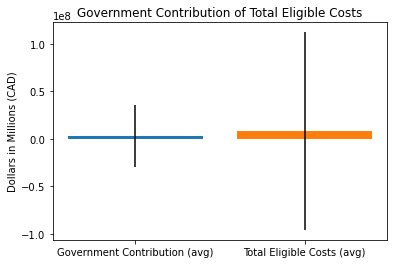

INSIGHT: Distribution of Total Costs is wide ranging.
This indicates a need to look more closly at the possibility of outliers.


In [47]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

# Bar plot of average Government Contribution to Eligible Costs with distributions
gov_cont = df_clean["Federal Contribution"].mean()
tot_cost=df_clean["Total Eligible Costs"].mean()

fig,ax = plt.subplots()
ax.bar("Government Contribution (avg)", gov_cont,yerr= df_clean["Federal Contribution"].std())
ax.bar("Total Eligible Costs (avg)", tot_cost, yerr= df_clean["Total Eligible Costs"].std()) 
ax.set_ylabel("Dollars in Millions (CAD)")
ax.set_title("Government Contribution of Total Eligible Costs")
plt.show()

quotient = df_clean["Federal Contribution"].mean()/df_clean["Total Eligible Costs"].mean()
percent = quotient*100
print("INSIGHT: Distribution of Total Costs is wide ranging.")
print("This indicates a need to look more closly at the possibility of outliers.")


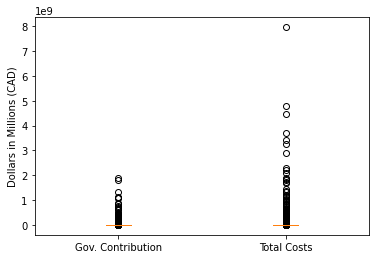

INSIGHT: There are only a few project with Total costs above 3M


In [48]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#boxplot to confirm distribution of data
fix, ax = plt.subplots()
ax.boxplot([df_clean["Federal Contribution"], df_clean["Total Eligible Costs"]])
ax.set_xticklabels(["Gov. Contribution", "Total Costs"])
ax.set_ylabel("Dollars in Millions (CAD)")
plt.show()

print("INSIGHT: There are only a few project with Total costs above 3M")


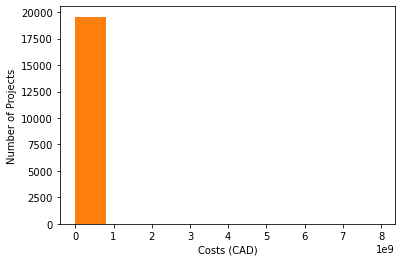

INSIGHT: Most projects have total elibible budgets under 1M


In [49]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#distribution of project costs
fig,ax = plt.subplots()
ax.hist(df_clean["Federal Contribution"])
ax.hist(df_clean["Total Eligible Costs"])
ax.set_xlabel("Costs (CAD)")
ax.set_ylabel("Number of Projects")
plt.show()

print("INSIGHT: Most projects have total elibible budgets under 1M")


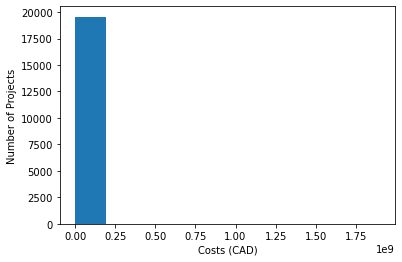

INSIGHT: The federal contribution to these projects is less than 250K


In [50]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#distribution of project costs
fig,ax = plt.subplots()
ax.hist(df_clean["Federal Contribution"])
ax.set_xlabel("Costs (CAD)")
ax.set_ylabel("Number of Projects")
plt.show()
print("INSIGHT: The federal contribution to these projects is less than 250K")


In [51]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

# Elibigle costs and Federal Contributions per year

#create Year column from Approved Date column
df_clean["Approved (Year)"] = df_clean["Approved Date"].dt.to_period('Y')
print(df_clean.info())

#Convert Approved (Year) dtype from period[A-DEC] to datetime
df_clean["Approved (Year)"] = df_clean ["Approved (Year)"].astype(str)
df_clean["Approved (Year)"] = pd.to_datetime(df_clean["Approved (Year)"])
print(df_clean.dtypes)

#save to csv
df_clean.to_csv("df_clean.csv")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Project Number                           19604 non-null  string        
 1   Title                                    19604 non-null  string        
 2   Program                                  19604 non-null  string        
 3   Category                                 19604 non-null  string        
 4   Location                                 19604 non-null  string        
 5   Province/Territory                       19604 non-null  string        
 6   Approved Date                            19604 non-null  datetime64[ns]
 7   Federal Contribution                     19604 non-null  int64         
 8   Total Eligible Costs                     19604 non-null  int64         
 9   Ultimate Recipient                     

In [52]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

#Costs by year
costs = df_clean.groupby(["Approved (Year)"])["Total Eligible Costs","Federal Contribution"].sum().reset_index()
print(costs)


   Approved (Year)  Total Eligible Costs  Federal Contribution
0       2002-01-01             216000000              56000000
1       2003-01-01             895773806             432886903
2       2004-01-01            3810820878            1393006514
3       2005-01-01            3819806388            1304271993
4       2006-01-01            3033094044            1006315082
5       2007-01-01            2437807231             832667848
6       2008-01-01            6236683052            2084585808
7       2009-01-01           15036840311            5077060373
8       2010-01-01            9408346613            3257801409
9       2011-01-01            2826909484             950352097
10      2012-01-01            2118542646             714751559
11      2013-01-01            1394719374             576197609
12      2014-01-01             608469327             233608365
13      2015-01-01            3994614555             990120106
14      2016-01-01           11650422457            477

/var/folders/xm/jg67lszd6sx7hwjdr_l4r3dr0000gn/T/ipykernel_73685/513704454.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  costs = df_clean.groupby(["Approved (Year)"])["Total Eligible Costs","Federal Contribution"].sum().reset_index()


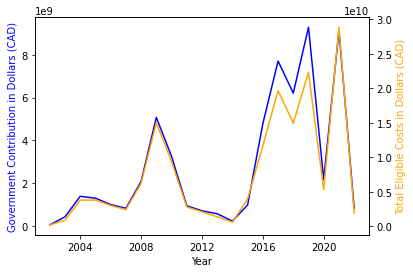

INSIGHT: Total Eligible Costs and Federal Contributions are aligned from 2004 - 2014(approx).
From 2014 - 2020, Federal contributions are greater than eligible costs - WHY?


In [53]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

# Elibigle costs and Federal Contributions per year - graphed

fig,ax=plt.subplots()
ax.plot(costs["Approved (Year)"],costs["Federal Contribution"], color='blue')
ax.set_xlabel("Year")
ax.set_ylabel("Government Contribution in Billions (CAD)", color='blue')
ax2 = ax.twinx()
ax2.plot(costs["Approved (Year)"],costs["Total Eligible Costs"], color='orange')
ax2.set_ylabel("Total Eligible Costs in Billions (CAD)", color='orange')
plt.show()

print("INSIGHT: Total Eligible Costs and Federal Contributions are aligned from 2004 - 2014(approx).")
print("From 2014 - 2020, Federal contributions are greater than eligible costs - WHY?")


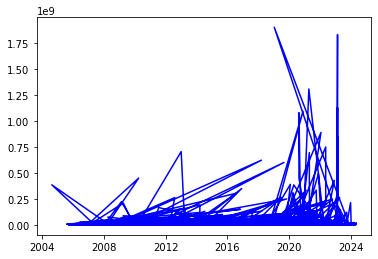

INSIGHT: Federal contributions have risen and fallen overtime, but show a marked increase after 2016


In [54]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#federal contribution rising or falling overtime?
#using 'Approved" column as most accurate measure govenrment commiment of funds over time'

x=df_clean["Construction End Date_full"]
y=df_clean["Federal Contribution"]

fig,ax=plt.subplots()
plt.plot(x,y,color='blue')
plt.show()

print("INSIGHT: Federal contributions have risen and fallen overtime, but show a marked increase after 2016")


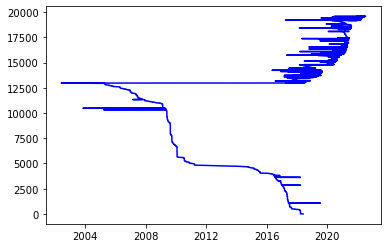

In [55]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#number of projects over time

x=df_clean["Approved Date"]
y=df_clean.index

fig,ax=plt.subplots()
plt.plot(x,y,color='blue')
plt.show()


In [56]:
#Part 1: Project Performance Analysis
# 1. A) Budgets by percentage: Federal Contribution vs Total Eligible Costs

#Check number of distint Project ID numbers:
unique_projnumb = df_clean["Project Number"].nunique()
print(unique_projnumb )

unique_proj_title = df_clean["Title"].nunique()
print(unique_proj_title)

print("INSIGHT: There are fewer unique project titles than there are project numbers, perhapse indicating repeate funding for the same projects year over year")


19604
17454
INSIGHT: There are fewer unique project titles than there are project numbers, perhapse indicating repeate funding for the same projects year over year


Text(0.5, 1.0, 'Most expensive projects by Government contribution and Project ID Number')


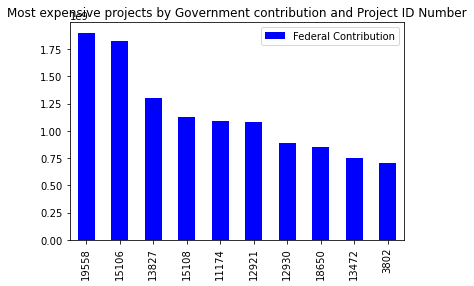

In [57]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

#Most expensive projects by Government contribution and Project ID Number
ex_projectsf=df_clean.groupby("Project Number") ["Federal Contribution"].sum().reset_index()
print(ex_projectsf.sort_values("Federal Contribution", ascending=False).head(10).plot(kind='bar', color='blue').set_title("Most expensive projects by Government contribution and Project ID Number")) 


In [1]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

#Most expensive projects by Total Eligible Costs and Project ID Number
ex_projectsf=df_clean.groupby("Project Number") ["Total Eligible Costs"].sum().reset_index()
print(ex_projectsf.sort_values("Total Eligible Costs", ascending=False).head(10).plot(kind='bar', color='orange').set_title("Most expensive projects by Government contribution and Project ID Number")) 
print(ex_projectsf.head())

NameError: name 'df_clean' is not defined

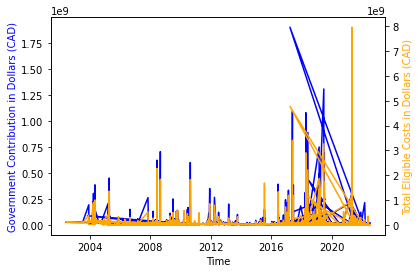

INSIGHT: Federal contributions exceed Total Eligible costs over time,


In [59]:
#Part 1: Project Performance Analysis
#1.A) Budgets by project

# Elibigle Costs and Government Contributions over time

fig,ax=plt.subplots()
ax.plot(df_clean["Approved Date"],df_clean["Federal Contribution"], color='blue')
ax.set_xlabel("Time")
ax.set_ylabel("Government Contribution in Dollars (CAD)", color='blue')
ax2 = ax.twinx()
ax2.plot(df_clean["Approved Date"],df_clean["Total Eligible Costs"], color='orange')
ax2.set_ylabel("Total Eligible Costs in Dollars (CAD)", color='orange')
plt.show()

print("INSIGHT: Federal contributions exceed Total Eligible costs over time,")


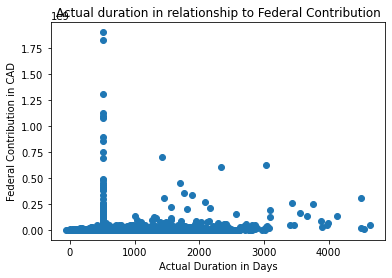

In [60]:
#Part 1: Project Performance Analysis
# 1.A.i) Relationships between cost and duration

#Scatterplot of Actual duration and fed contribution
fig,ax = plt.subplots()
ax.scatter(df_clean["Actual Duration (days)_full_int"], df_clean["Federal Contribution"])
ax.set_xlabel("Actual Duration in Days")
ax.set_ylabel("Federal Contribution in CAD")
ax.set_title ("Actual duration in relationship to Federal Contribution")
plt.show()


Text(0.5, 1.0, 'Projects with best ROI: greatest number of days per dollar spent')


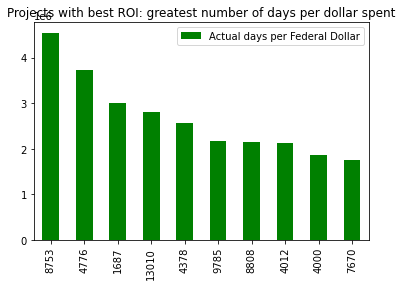

In [61]:
#Part 1: Project Performance Analysis
# 1.A.i) Relationships between cost and duration

#Calculation of project days per dollar of federal contribution
df_clean["Actual days per Federal Dollar"] = df_clean["Federal Contribution"]/ df_clean["Actual Duration (days)_full_int"]
df_clean = df_clean.replace(np.inf, np.nan)

#Projects with best ROI ie: greatest number of days per dollar spent
ROI = df_clean.groupby("Title")["Actual days per Federal Dollar"].sum().reset_index()
print(ROI.sort_values("Actual days per Federal Dollar", ascending=False).head(10).plot(kind='bar', color='green').set_title("Projects with best ROI: greatest number of days per dollar spent"))


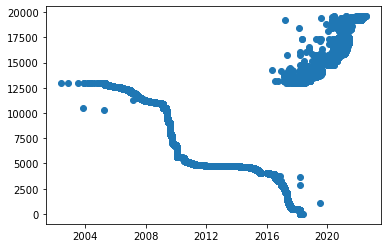

In 2016, same year the Government releases its statement on new priorities for infrustructure spending, there is a dramatic increase in the number of approved projects.


In [62]:
#Part 1: Project Performance Analysis
# 1.A.i) Relationships between cost and duration

# Relationships between costs and duration by project

# Projects over time
x = df_clean["Approved Date"]
y = df_clean.index

plt.scatter(x, y)
plt.show()

print("In 2016, same year the Government releases its statement on new priorities for infrustructure spending, there is a dramatic increase in the number of approved projects.")
#Tableau: Zoom in on Approved projects 2016 - 2020, By Region, Category, and Budget


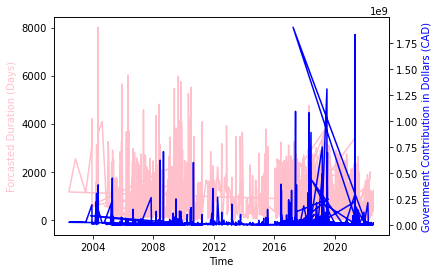

INSIGHT: Forcasted duration of projects gradually declines over time,
federal contributions rise.


In [63]:
#Part 1: Project Performance Analysis
# 1. A.) i) Forcasted duration vs Government Cost over time

fig,ax=plt.subplots()
ax.plot(df_clean["Approved Date"],df_clean["Forcasted Duration (days)_full_int"], color='pink')
ax.set_xlabel("Time")
ax.set_ylabel("Forcasted Duration (Days)", color='pink')
ax2 = ax.twinx()
ax2.plot(df_clean["Approved Date"],df_clean["Federal Contribution"], color='blue')
ax2.set_ylabel("Government Contribution in Dollars (CAD)", color='blue')
plt.show()

print("INSIGHT: Forcasted duration of projects gradually declines over time,")
print("federal contributions rise.")


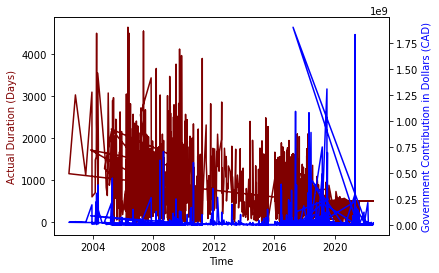

INSIGHT: Actual duration of projects declines over time,
federal contributions rise.


In [64]:
#Part 1: Project Performance Analysis
# 1.A.i) Actual duration vs Government Cost over time

fig,ax=plt.subplots()
ax.plot(df_clean["Approved Date"],df_clean["Actual Duration (days)_full_int"], color='maroon')
ax.set_xlabel("Time")
ax.set_ylabel("Actual Duration (Days)", color='maroon')
ax2 = ax.twinx()
ax2.plot(df_clean["Approved Date"],df_clean["Federal Contribution"], color='blue')
ax2.set_ylabel("Government Contribution in Dollars (CAD)", color='blue')
plt.show()

print("INSIGHT: Actual duration of projects declines over time,")
print("federal contributions rise.")


Text(0.5, 1.0, 'Projects with longest Forcasted Duration(Days) by Project ID Number')


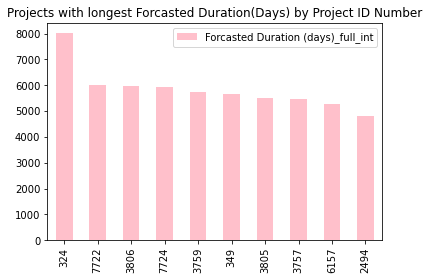

In [65]:
#Part 1: Project Performance Analysis
#1.B.i) Relationship between Forcasted and Actual duration

#longest Forcasted duration projects by Project Number 
l_projects=df_clean.groupby("Project Number")["Forcasted Duration (days)_full_int"].sum().reset_index()
print(l_projects.sort_values("Forcasted Duration (days)_full_int", ascending=False).head(10).plot(kind='bar', color='pink').set_title("Projects with longest Forcasted Duration(Days) by Project ID Number"))


Text(0.5, 1.0, 'Projects with longest Actual Duration (Days) by Project ID Number')


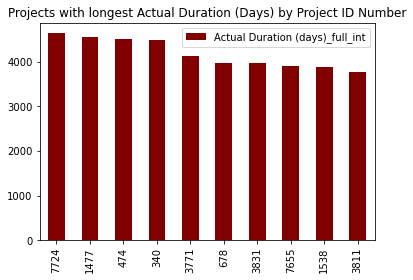

In [66]:
#Part 1: Project Performance Analysis
#1.B.i) Relationship between Forcasted and Actual duration

#longest Actual duration projects by Project Number 

l_projects=df_clean.groupby("Project Number")["Actual Duration (days)_full_int"].sum().reset_index()
print(l_projects.sort_values("Actual Duration (days)_full_int", ascending=False).head(10).plot(kind='bar', color='maroon').set_title("Projects with longest Actual Duration (Days) by Project ID Number"))


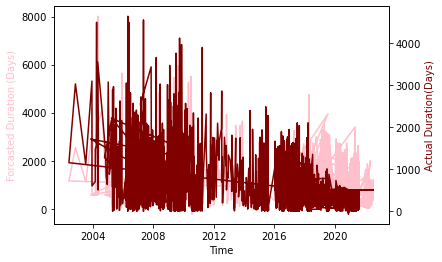

INSIGHT: While forcasted and actual duration are aligned from 2004 - 2017,
there is greater disparity between them from 2016 onward
This is suggestive of more efficiant project management, and declining estimation acurracy


In [67]:
#Part 1: Project Performance Analysis
#1.B.i) Relationship between Forcasted and Actual duration

# Forcasted duration vs Actual Duration over time 
#Did forcasted date estimates improve overtime?
#ie: does forcasted dates more closely match actual dates  over time?

fig,ax=plt.subplots()
ax.plot(df_clean["Approved Date"],df_clean["Forcasted Duration (days)_full_int"], color='pink')
ax.set_xlabel("Time")
ax.set_ylabel("Forcasted Duration (Days)", color='pink')
ax2 = ax.twinx()
ax2.plot(df_clean["Approved Date"],df_clean["Actual Duration (days)_full_int"], color='maroon')
ax2.set_ylabel("Actual Duration(Days)", color='maroon')
plt.show()

print("INSIGHT: While forcasted and actual duration are aligned from 2004 - 2017,")
print("there is greater disparity between them from 2016 onward")
print("This is suggestive of more efficiant project management, and declining estimation acurracy")


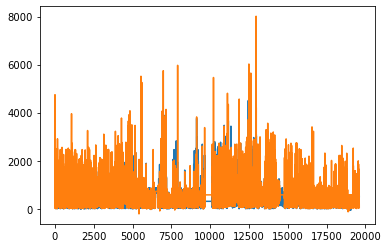

In [68]:
#Part 1: Project Performance Analysis
#1.B Project Timelines: projected vs actuals

y1=np.array(df_clean["Actual Duration (days)_full_int"])
y2=np.array(df_clean["Forcasted Duration (days)_full_int"])
plt.plot(y1)
plt.plot(y2)
plt.show()


In [70]:
#Part 1: Project Performance Analysis
#1.B.i) Macro view of project durations (actual and forcasted) 
print("INSIGHT: Difference in days between Actual and Forcasted duration on average :", avg_dur_diff)


INSIGHT: Difference in days between Actual and Forcasted duration on average : 67.15369312385229


Text(0.5, 1.0, 'Projects with hightest ROI: Most project days per Federal Dollar')
INSIGHT: Project number 19558 has the highst ROI for federal dollars spent


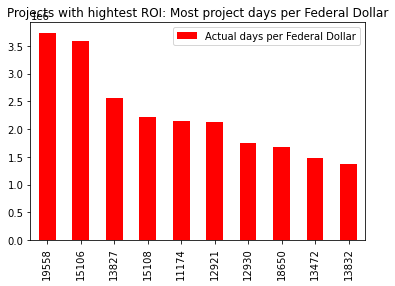

In [71]:
#Part 1: Project Performance Analysis - INSIGHTS
#1.1. Project time per dollar spent: Projects with best ROI

best_roi=df_clean.groupby(["Project Number"])["Actual days per Federal Dollar"].sum().reset_index()
print(best_roi.sort_values("Actual days per Federal Dollar", ascending=False).head(10).plot(kind='bar', color='red').set_title("Projects with hightest ROI: Most project days per Federal Dollar"))

print("INSIGHT: Project number 19558 has the highst ROI for federal dollars spent")


In [ ]:
#Part 2: Regional Performance Analysis


In [72]:
#Part 2: Regional Performance Analysis

#SANITY CHECK Of df_clean: 
print(df_clean.info())
df_clean.to_csv("df_clean.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Project Number                           19604 non-null  string        
 1   Title                                    19604 non-null  string        
 2   Program                                  19604 non-null  string        
 3   Category                                 19604 non-null  string        
 4   Location                                 19604 non-null  string        
 5   Province/Territory                       19604 non-null  string        
 6   Approved Date                            19604 non-null  datetime64[ns]
 7   Federal Contribution                     19604 non-null  int64         
 8   Total Eligible Costs                     19604 non-null  int64         
 9   Ultimate Recipient                     

In [73]:
#Part 2: Regional Performance Analysis
# 2.A) Number of Projects per Region

proj_reg = df_clean.groupby(["Province/Territory"])["Project Number"].count()
print(proj_reg)


Province/Territory
ab    1107
bc    1654
mb     678
nb     752
nl    1215
ns     726
nt     215
nu      50
on    7655
pe     423
qc    3561
sk    1370
yt     198
Name: Project Number, dtype: int64


In [74]:
#Part 2: Regional Performance Analysis
# 2.A) Number of Projects per Region

#Number of projects by Location

#locations with highest number of projects
proj_loc = df_clean.groupby(["Province/Territory","Location"])["Project Number"].count().reset_index()
proj_loc_sort_high = proj_loc.sort_values(["Project Number"], ascending = False).head(5)
print(proj_loc_sort_high)

#locations with lowest number of projects
proj_loc = df_clean.groupby(["Province/Territory","Location"])["Project Number"].count().reset_index()
proj_loc_sort_low = proj_loc.sort_values(["Project Number"]).head(5)
print(proj_loc_sort_low)


     Province/Territory     Location  Project Number
2440                 on      Toronto             724
2950                 qc     Montréal             361
2245                 on       Ottawa             277
2144                 on  Mississauga             260
2455                 on      Vaughan             193
     Province/Territory                           Location  Project Number
0                    ab                      Acadia No. 34               1
2954                 qc                      Métis-sur-Mer               1
2957                 qc  Naskapi Nation of Kawawachikamach               1
2958                 qc                            Nemaska               1
1252                 nl                    Nippers Harbour               1


In [75]:
#Part 2: Regional Performance Analysis
#2.B) Timelines: Forcasted vs Actual duration by region

#Regions with Highest Forcasted durations
loc_for_high = df_clean.groupby(["Province/Territory","Location"])["Forcasted Duration (days)_full_int"].sum().reset_index()
print(loc_for_high.sort_values("Forcasted Duration (days)_full_int", ascending=False).head(5))

#Regions with Lowest Forcasted durations
loc_for_high = df_clean.groupby(["Province/Territory","Location"])["Forcasted Duration (days)_full_int"].sum().reset_index()
print(loc_for_high.sort_values("Forcasted Duration (days)_full_int").head(5))


     Province/Territory     Location  Forcasted Duration (days)_full_int
2440                 on      Toronto                            372576.0
2245                 on       Ottawa                            217703.0
2950                 qc     Montréal                            209367.0
2144                 on  Mississauga                            169231.0
2069                 on       London                            119828.0
     Province/Territory              Location  \
468                  bc  K'ómoks First Nation   
336                  bc               Argenta   
561                  bc      Penelakut Island   
2138                 on           Mine Centre   
2451                 on                Upsala   

      Forcasted Duration (days)_full_int  
468                                -73.0  
336                                  6.0  
561                                  7.0  
2138                                 9.0  
2451                                14.0  


In [76]:
#Part 2: Regional Performance Analysis
#2.B) Timelines: Forcasted vs Actual duration by region

#Regions with Highest Actual durations
loc_act_high = df_clean.groupby(["Province/Territory","Location"])["Actual Duration (days)_full_int"].sum().reset_index()
print(loc_act_high.sort_values("Actual Duration (days)_full_int", ascending=False).head(5))

#Regions with Lowest Actual durations
loc_act_low = df_clean.groupby(["Province/Territory","Location"])["Actual Duration (days)_full_int"].sum().reset_index()
print(loc_act_low.sort_values("Actual Duration (days)_full_int").head(5))


     Province/Territory     Location  Actual Duration (days)_full_int
2440                 on      Toronto                         291825.0
2950                 qc     Montréal                         192171.0
2245                 on       Ottawa                         153876.0
2144                 on  Mississauga                         112041.0
3027                 qc       Québec                         103737.0
     Province/Territory            Location  Actual Duration (days)_full_int
2699                 qc           Champlain                              1.0
3908                 sk           Sintaluta                              3.0
615                  bc  South Gulf Islands                              6.0
1167                 nl     Goose Cove East                              9.0
450                  bc        Headquarters                             10.0


In [77]:
#Part 2: Regional Performance Analysis
#2.C) Funding, population, and ROI by region

# Funding by region
group2= df_clean.groupby("Province/Territory")["Federal Contribution"].sum().reset_index()
print(group2.sort_values("Federal Contribution", ascending=False))
print("Ontario, Quebec and British Columnbia have recieved the most federal funds for infrustructure. NewFoundLand, Nunavut, and Prince Edward Island have recieved the least.")


   Province/Territory  Federal Contribution
8                  on           21892497829
10                 qc           11378079269
1                  bc            7528852058
0                  ab            7191576849
2                  mb            2094896004
11                 sk            1617000021
5                  ns            1541120194
3                  nb            1433261092
6                  nt             970422039
12                 yt             954353492
4                  nl             930138970
7                  nu             876103993
9                  pe             627993355
Ontario, Quebec and British Columnbia have recieved the most federal funds for infrustructure. NewFoundLand, Nunavut, and Prince Edward Island have recieved the least.


In [80]:
#Part 2: Regional Performance Analysis
#2.C) Funding, population, and ROI by region

#Compare regional funding data with population data: 
# https://worldpopulationreview.com/canadian-provinces
df_pop = pd.read_csv("/Users/esthersimmonds-macadam/Documents/Education/Springboard/Springboard_Curriculum/16_Captstone_Two/16_2_Analyse_a_Dataset/16_2_Canadian_Population Data_csvData.csv")

#rename province/terreitory column in df_pop
df_pop1 = df_pop.rename(columns={"name":"Province/Territory"})
print(df_pop1)
print("When compared with population data from 2011 to 2020*, federal contributions by province/territory are aligned with population sizes, with slight variation in the last 5 provinces/territories. Though the Yukon and Northwest Territories have smaller populations, their location in the far north of the country could explain an heighted level of investment in infrustructure, regardless of population for these territories.")


      Province/Territory   pop2020   pop2016   pop2011  growthRate
0                Ontario  14826276  13448494  12851821      0.0247
1                 Quebec   8604495   8164361   7903000      0.0132
2       British Columbia   5214805   4648055   4400057      0.0292
3                Alberta   4442879   4067175   3645257      0.0223
4               Manitoba   1383765   1278365   1208268      0.0200
5           Saskatchewan   1179844   1098352   1053960      0.0181
6            Nova Scotia    992055    923598    921727      0.0180
7          New Brunswick    789225    747101    751171      0.0138
8           Newfoundland    520553    519716    514536      0.0004
9   Prince Edward Island    164318    142907    140204      0.0355
10   Northwest Territory     45504     41786     41462      0.0215
11                 Yukon     42986     35874     33897      0.0463
12               Nunavut     39403     35944     31906      0.0232
When compared with population data from 2011 to 2020*, federal

In [340]:
#Part 2: Regional Performance Analysis
#2.C) Funding, population, and ROI by region

#Join df_clean and df_pop
#Q: better way? want to ad pop data  per province - loop?
#Do in Tableau

#print(df_pop1.info())

#df_join = pd.merge(df_clean, df_pop1, how='inner', on="Province/Territory")
#print(df_join.info())
#print(df_join.head())

In [81]:
#Part 2: Regional Performance Analysis
#2.C) Funding, population, and ROI by region

#ROI by region

#Regions with Highest ROI
loc_roi_high = df_clean.groupby(["Province/Territory","Location"])["Actual days per Federal Dollar"].sum().reset_index()
print(loc_roi_high.sort_values("Actual days per Federal Dollar", ascending=False).head(5))

#Regions with lowest ROI
loc_roi_low = df_clean.groupby(["Province/Territory","Location"])["Actual days per Federal Dollar"].sum().reset_index()
print(loc_roi_low.sort_values("Actual days per Federal Dollar").head(5))

print("INSIGHT: Regarding ROI, Toronto, Montreal and Calgary show the highest return on federal investment, where as Wolseley, Taykwa Tagamou First Nation, and Wabauskang First Nation show the least")


     Province/Territory  Location  Actual days per Federal Dollar
2440                 on   Toronto                    1.433275e+07
2950                 qc  Montréal                    5.863898e+06
57                   ab   Calgary                    4.371515e+06
3027                 qc    Québec                    4.158812e+06
111                  ab  Edmonton                    3.741091e+06
     Province/Territory                     Location  \
3992                 sk                     Wolseley   
2411                 on  Taykwa Tagamou First Nation   
2462                 on      Wabauskang First Nation   
3889                 sk                    Rush Lake   
2335                 on                     Seaforth   

      Actual days per Federal Dollar  
3992                    -1506.968060  
2411                        0.411184  
2462                        2.127768  
3889                        3.390515  
2335                        4.007494  
INSIGHT: Regarding ROI, Toronto, 

Text(0.5, 1.0, 'Number of Projects by Category')


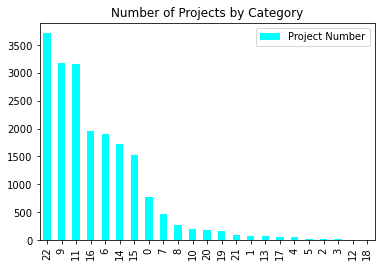

In [82]:
#Part 3: Strategic Alignment
#3.A) Number of Projects by Category

#group terms
cat_count = df_clean.groupby(["Category"])["Project Number"].count().reset_index()
print(cat_count.sort_values("Project Number", ascending=False).plot(kind='bar', color='cyan').set_title("Number of Projects by Category"))


Text(0.5, 1.0, 'Actual duration by category')


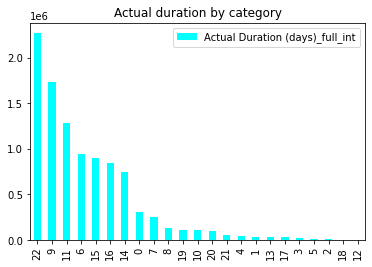

In [83]:
#Part 3: Strategic Alignment
#3.B) Timeline: Actual duration by category

dur_cat= df_clean.groupby(["Category"])["Actual Duration (days)_full_int"].sum().reset_index()
print(dur_cat.sort_values("Actual Duration (days)_full_int", ascending=False).plot(kind='bar', color='cyan').set_title("Actual duration by category"))


Text(0.5, 1.0, 'Federal Funding by Category')
Public Transit, Highways and Roads, and Watewater are the project categories that have recieved the highest level of federal funds. Administration, Affodable And Temporary Housing, and Shortline Rail have recieved the least.


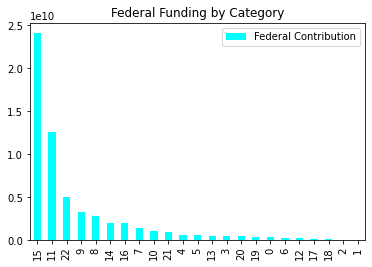

In [84]:
#Part 3: Strategic Alignment
#3.C) Project categories that the most federal funding

fund_cat= df_clean.groupby("Category")["Federal Contribution"].sum().reset_index()
print(fund_cat.sort_values("Federal Contribution", ascending=False).plot(kind='bar', color='cyan').set_title("Federal Funding by Category"))
print("Public Transit, Highways and Roads, and Watewater are the project categories that have recieved the highest level of federal funds. Administration, Affodable And Temporary Housing, and Shortline Rail have recieved the least.")
